In [7]:
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
from scipy.special import factorial

1. Using basic statistical properties of the variance, as well as single variable calculus, derive `(5.6)`. In other words, prove that α given by `(5.6)` does indeed minimize Var`(αX + (1 − α)Y )`.

[q1](https://github.com/coxy1989/mlsabbatical/blob/master/notebooks/statistical_learning/ch5_statistical_learning/q1.JPG?raw=true)

2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of `n` observations.

(a) What is the probability that the first bootstrap observation is not the `jth` observation from the original sample? Justify your answer.

- `(n - 1) / n = 1 - (1 / n)`
- `(n - 1)` outcomes from `n` possibilites correspond to this event

(b) What is the probability that the second bootstrap observation is not the `jth` observation from the original sample?

- `(n - 1) / n = 1 - (1 / n)`
- `(n - 1)` outcomes from `n` possibilites correspond to this event
- This is identical to (a) due to replacement.

(c) Argue that the probability that the jth observation is not in the bootstrap sample is `(1 − 1/n) ^ n`

- The probability that any any observation in the sample is not the `jth` observation from the original sample is `(1 -1/n) ^n`
- Therefore, the probability that none of them are is `(1 - 1/n) * (1 -1/n) * ...` = `(1 -1/n) ^n`

(d) When `n = 5`, what is the probability that the `jth` observation is in the bootstrap sample?

In [42]:
1 - (1 - (1/5)) ** 5

0.6723199999999999

(d) When n = 100, what is the probability that the jth observation is in the bootstrap sample?

In [44]:
1 - (1 - (1/100)) ** 100

0.6339676587267709

(f) When n = 10, 000, what is the probability that the jth observa- tion is in the bootstrap sample?

In [64]:
1 - (1 - (1/10000)) ** 10000

0.6321389535670295

(g) Create a plot that displays, for each integer value of n from 1 to 100,000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.

- The value rapidly approaches a limit at around `0.63`

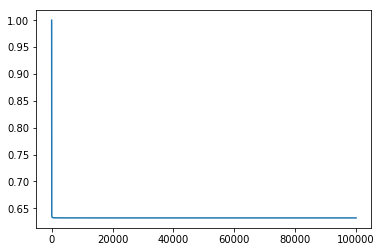

In [4]:
xs = np.arange(1,100000)
ys = [1 - (1 - (1/x)) ** x for x in xs]
sns.lineplot(x=xs, y=ys)

(h) We will now investigate numerically the probability that a bootstrap sample of size `n = 100` contains the `jth` observation. Here `j = 4`. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

- This is consistent with our findings in (g)

In [5]:
res = []
for r in np.arange(1, 10000):
    data = pd.Series(np.arange(1,101))
    sample = data.sample(data.shape[0], replace=True)
    res.append((sample == 4).sum() > 0)

np.array(res).mean()

0.6284628462846285

3.We now review k-fold cross-validation.

(a) Explain how k-fold cross-validation is implemented.

- Select a value for `k`
- Split data into `k` subsets
- `Enter Loop over k`
- Train the model using `k - 1` of the subsets.
- Evaluate model on the remaining subset that was *not* used in training and stash the resulting performance metric.
- (Back to top of loop until each subset has been left out precisely once)
- `Exit Loop`
- Take average of stashed performance metrics.


(b) What are the advantages and disadvantages of k-fold cross-validation relative to:

i. The validation set approach?

- When the volume of data available is limited, k-fold cross validation affords a lower bias approximation of the test error when compared to the validation set approach as more of the available data is used to train the model.

- k-fold cross validation is conceptually more complicated and is more effort to implement than the validation set approach. When the volume of available data is very large, it is possible to obtain a low bias estimate of the test error using the simpler validation set approach.
 

ii. LOOCV?

- LOOCV is equivalent to k-fold where `k = n`. There is a bias-variance trade off in the estimate provided for the test error given different valus of `k`. As the value for `k` approaches `n` the variance of the estimate increases and the bias of the estimate decreases. The inverse is true as the value for `k` approaches `2`. LOOC affords a lower bias estimate of the test error but incurs higher variance.


4. Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.

We can achieve this using the bootstrap.

- Choose a large value for rho, on the order of `10^5`
- `Enter loop over rho`
- Resample the training set with replacement
- Use the statistical learning method to obtain the prediction using the resampled data, stash the value
- (Back to top of loop until we have `rho` predictions)
- `Exit loop`
- Calculate SD of predictions
